In [2]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [3]:
d2='''333.13        1974.38        1974          5
  332.09        1974.46        1974          6
  331.10        1974.54        1974          7
  329.14        1974.63        1974          8
  327.36        1974.71        1974          9
  327.29        1974.79        1974         10
  328.23        1974.88        1974         11
  329.55        1974.96        1974         12
  330.62        1975.04        1975          1
  331.40        1975.13        1975          2
  331.87        1975.21        1975          3
  333.18        1975.29        1975          4
  333.92        1975.38        1975          5
  333.43        1975.46        1975          6
  331.85        1975.54        1975          7
  330.01        1975.63        1975          8
  328.51        1975.71        1975          9
  328.41        1975.79        1975         10
  329.25        1975.88        1975         11
  330.97        1975.96        1975         12 
  331.60        1976.04        1976          1
  332.60        1976.13        1976          2
  333.57        1976.21        1976          3
  334.72        1976.29        1976          4
  334.68        1976.38        1976          5
  334.17        1976.46        1976          6
  332.96        1976.54        1976          7
  330.80        1976.63        1976          8
  328.98        1976.71        1976          9
  328.57        1976.79        1976         10
  330.20        1976.88        1976         11
  331.58        1976.96        1976         12
  332.67        1977.04        1977          1
  333.17        1977.13        1977          2
  334.86        1977.21        1977          3
  336.07        1977.29        1977          4
  336.82        1977.38        1977          5
  336.12        1977.46        1977          6
  334.81        1977.54        1977          7
  332.56        1977.63        1977          8
  331.30        1977.71        1977          9
  331.22        1977.79        1977         10
  332.37        1977.88        1977         11
  333.49        1977.96        1977         12 
  334.71        1978.04        1978          1
  335.23        1978.13        1978          2
  336.54        1978.21        1978          3
  337.79        1978.29        1978          4
  337.95        1978.38        1978          5
  338.00        1978.46        1978          6
  336.37        1978.54        1978          7
  334.47        1978.63        1978          8
  332.46        1978.71        1978          9
  332.29        1978.79        1978         10
  333.76        1978.88        1978         11
  334.80        1978.96        1978         12 
  336.00        1979.04        1979          1
  336.63        1979.13        1979          2
  337.93        1979.21        1979          3
  338.95        1979.29        1979          4
  339.05        1979.38        1979          5
  339.27        1979.46        1979          6
  337.64        1979.54        1979          7
  335.68        1979.63        1979          8
  333.77        1979.71        1979          9
  334.09        1979.79        1979         10
  335.29        1979.88        1979         11
  336.76        1979.96        1979         12 
  337.77        1980.04        1980          1
  338.26        1980.13        1980          2
  340.10        1980.21        1980          3
  340.88        1980.29        1980          4
  341.47        1980.38        1980          5
  341.31        1980.46        1980          6
  339.41        1980.54        1980          7
  337.74        1980.63        1980          8
  336.07        1980.71        1980          9
  336.07        1980.79        1980         10
  337.22        1980.88        1980         11
  338.38        1980.96        1980         12 
  339.32        1981.04        1981          1
  340.41        1981.13        1981          2
  341.69        1981.21        1981          3
  342.51        1981.29        1981          4
  343.02        1981.38        1981          5
  342.54        1981.46        1981          6
  340.88        1981.54        1981          7
  338.75        1981.63        1981          8
  337.05        1981.71        1981          9
  337.13        1981.79        1981         10
  338.45        1981.88        1981         11
  339.85        1981.96        1981         12 
  340.90        1982.04        1982          1
  341.70        1982.13        1982          2
  342.70        1982.21        1982          3
  343.65        1982.29        1982          4
  344.28        1982.38        1982          5
  343.42        1982.46        1982          6
  342.02        1982.54        1982          7
  339.97        1982.63        1982          8
  337.84        1982.71        1982          9
  338.00        1982.79        1982         10
  339.20        1982.88        1982         11
  340.63        1982.96        1982         12 
  341.41        1983.04        1983          1
  342.68        1983.13        1983          2
  343.04        1983.21        1983          3
  345.27        1983.29        1983          4
  345.92        1983.38        1983          5
  345.40        1983.46        1983          6
  344.16        1983.54        1983          7
  342.11        1983.63        1983          8
  340.11        1983.71        1983          9
  340.15        1983.79        1983         10
  341.38        1983.88        1983         11
  343.02        1983.96        1983         12 
  343.87        1984.04        1984          1
  344.59        1984.13        1984          2
  345.11        1984.21        1984          3
  347.07        1984.29        1984          4
  347.38        1984.38        1984          5
  346.78        1984.46        1984          6
  344.96        1984.54        1984          7
  342.71        1984.63        1984          8
  340.86        1984.71        1984          9
  341.13        1984.79        1984         10
  342.84        1984.88        1984         11
  344.32        1984.96        1984         12 
  344.88        1985.04        1985          1
  345.62        1985.13        1985          2
  347.23        1985.21        1985          3
  347.62        1985.29        1985          4
  348.53        1985.38        1985          5
  347.87        1985.46        1985          6
  346.00        1985.54        1985          7
  343.86        1985.63        1985          8
  342.55        1985.71        1985          9
  342.57        1985.79        1985         10
  344.11        1985.88        1985         11
  345.49        1985.96        1985         12 
  346.04        1986.04        1986          1
  346.70        1986.13        1986          2
  347.38        1986.21        1986          3
  349.38        1986.29        1986          4
  349.93        1986.38        1986          5
  349.26        1986.46        1986          6
  347.44        1986.54        1986          7
  345.55        1986.63        1986          8
  344.21        1986.71        1986          9
  343.67        1986.79        1986         10
  345.09        1986.88        1986         11
  346.27        1986.96        1986         12 
  347.33        1987.04        1987          1
  347.82        1987.13        1987          2
  349.29        1987.21        1987          3
  350.91        1987.29        1987          4
  351.71        1987.38        1987          5
  350.94        1987.46        1987          6
  349.10        1987.54        1987          7
  346.77        1987.63        1987          8
  345.73        1987.71        1987          9'''
data=re.split(r'        |\n',d2)
data=np.array(data).reshape(-1,4)

In [4]:
df=pd.DataFrame(data=data,columns="CO2,Year&Month,Year,Month".split(','))
df['CO2']=df['CO2'].astype(float)
df=df.drop('Year&Month',axis=1)
df['DATE'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df=df.drop(['Year','Month'],axis=1)

In [5]:
df.head()

,CO2,DATE
0,333.13,1974-05-01
1,332.09,1974-06-01
2,331.10,1974-07-01
3,329.14,1974-08-01
4,327.36,1974-09-01


In [6]:
train=df[:140]
test=df[139:]

<AxesSubplot:>

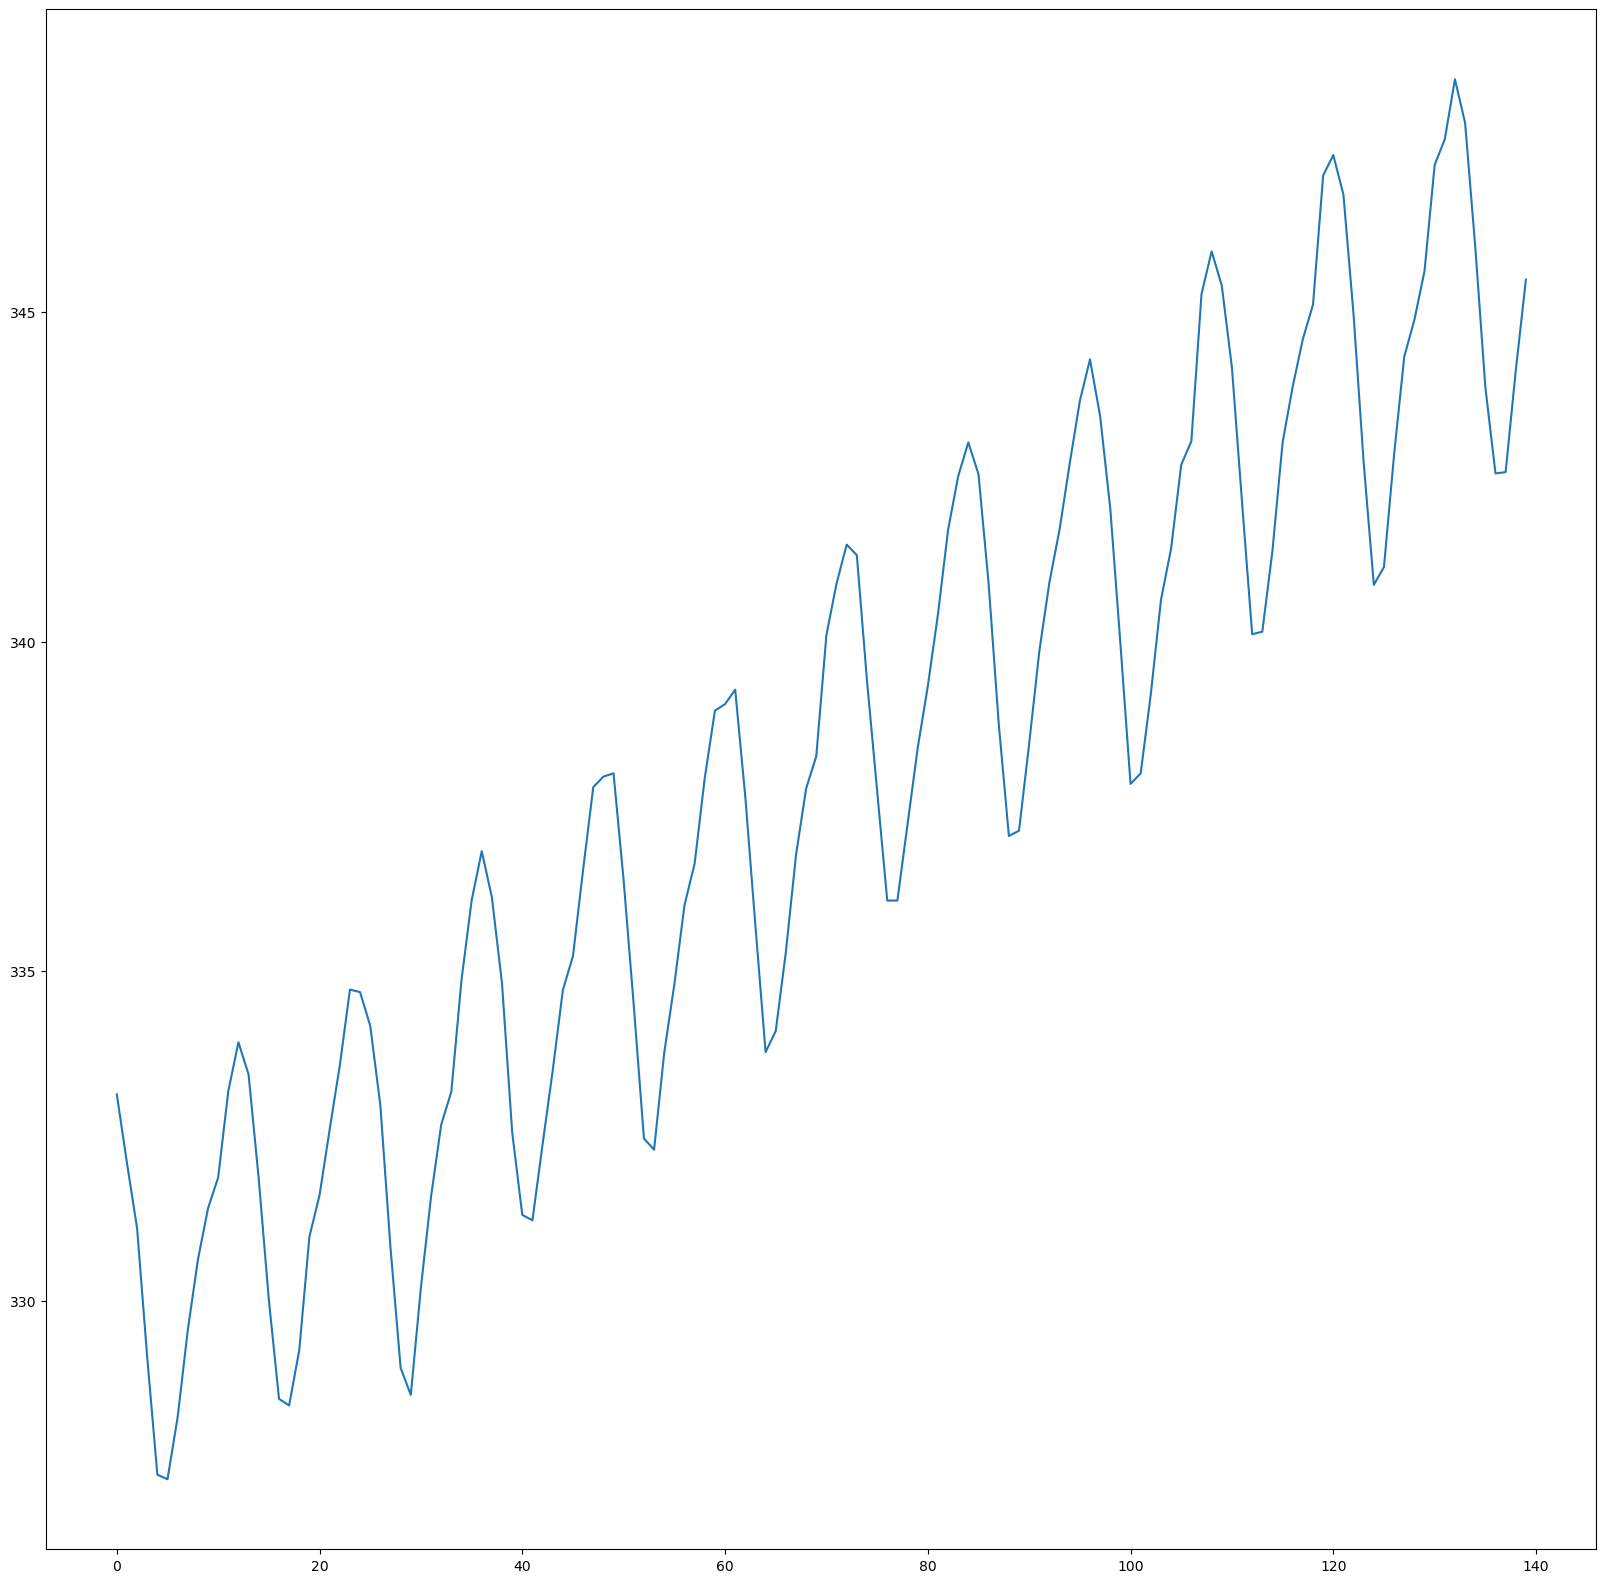

In [7]:
train['CO2'].plot(figsize=(20,20))

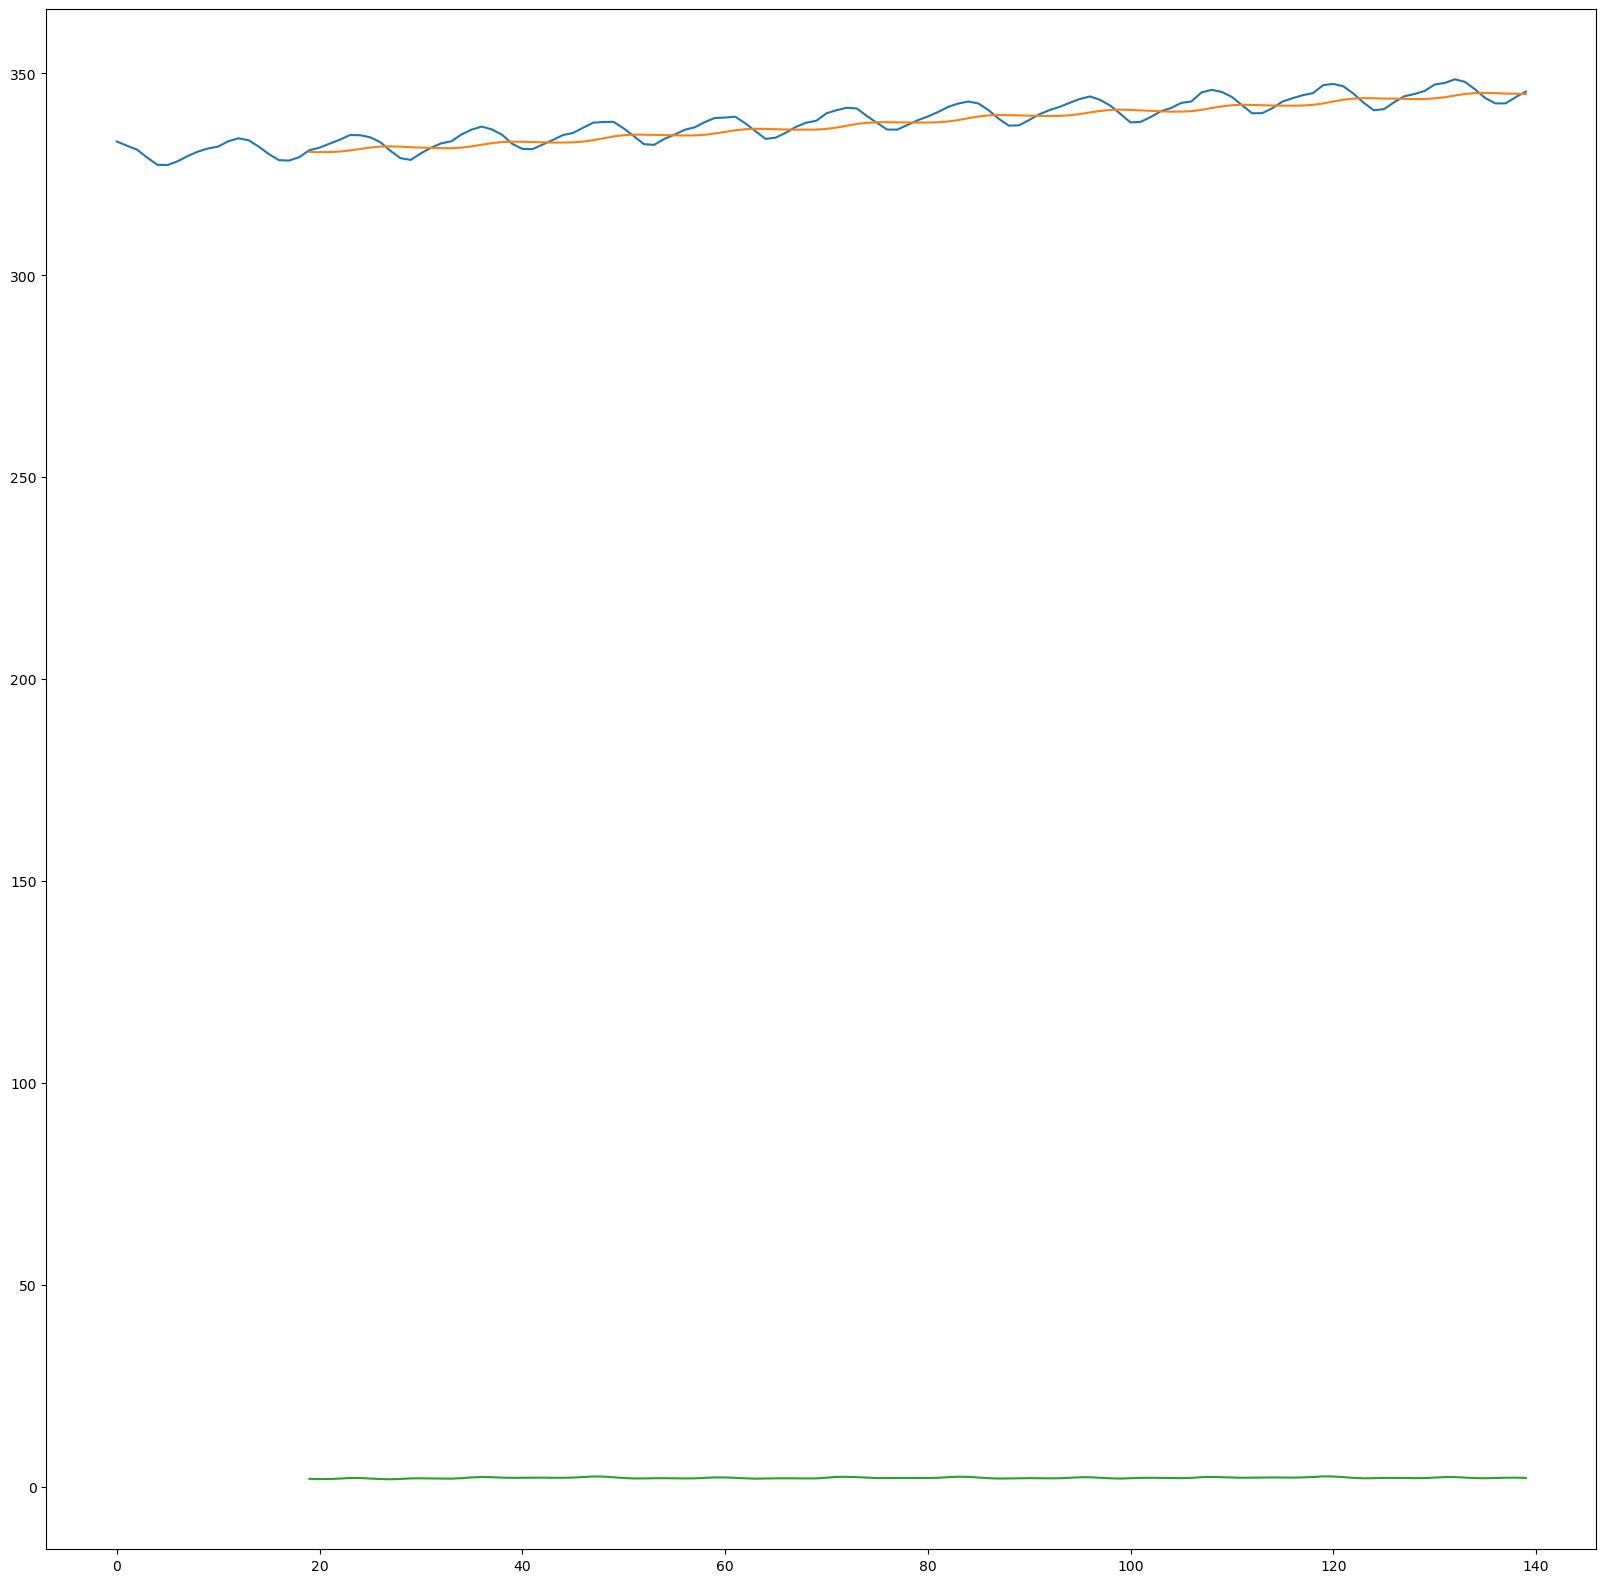

In [8]:
rolling_mean=train['CO2'].rolling(window=20).mean()
rolling_std=train['CO2'].rolling(window=20).std()
plt.figure(figsize=(20,20))
plt.plot(train['CO2'])
plt.plot(rolling_mean)
plt.plot(rolling_std)

# Checking stationarity

In [9]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(train['CO2'])
print('p-value',dftest[1])
#result : Higher p value. accept null where data is not stationary.
#Therefore not stationary

p-value 0.9341682928941236


C:\Users\sanja\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


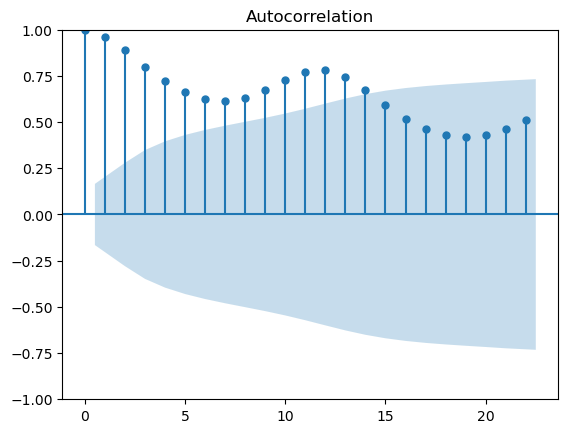

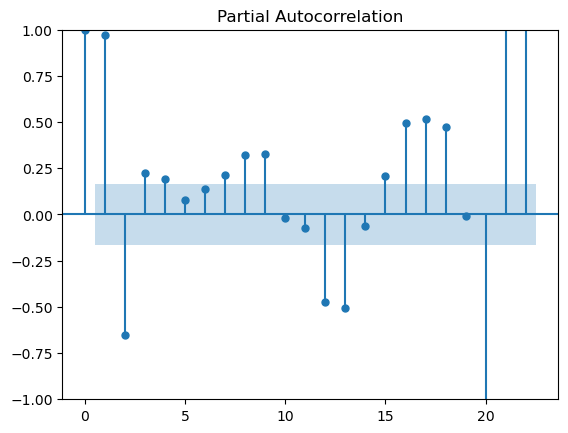

In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf=plot_acf(train['CO2'])
pacf=plot_pacf(train['CO2'])

# Differencing and testing stationarity

In [11]:
d1=train['CO2'].diff()
d1=d1.dropna()
dftest1=adfuller(d1)
dftest1[1]
#result: first order differential is stationary

0.03221950506559386

In [12]:
#for further differencing use the same method on the previous order of differencing
d2=d1.diff()
d2=d2.dropna()
dftest2=adfuller(d2)
dftest2[1]

5.756553392001233e-17

# Finding parameters for AR and MA 

C:\Users\sanja\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


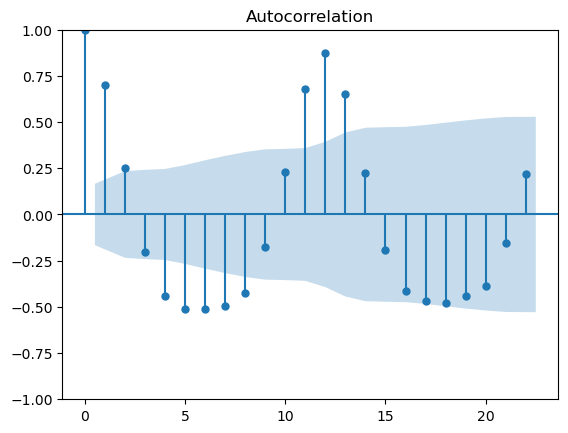

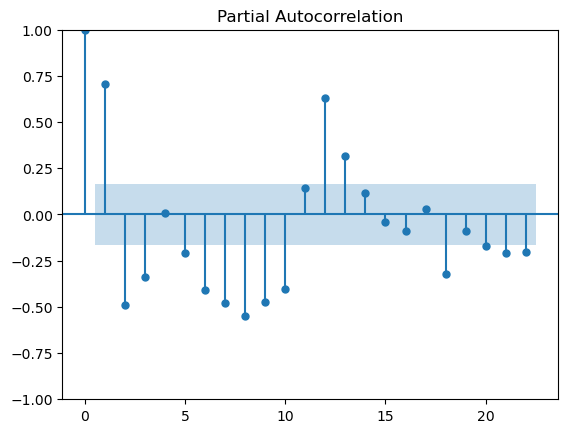

In [13]:
acf1=plot_acf(d1)
pacf1=plot_pacf(d1)

In [14]:
!pip install pmdarima
import pmdarima as pm

In [15]:
auto_arima=pm.auto_arima(train['CO2'])
auto_arima

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

<AxesSubplot:>

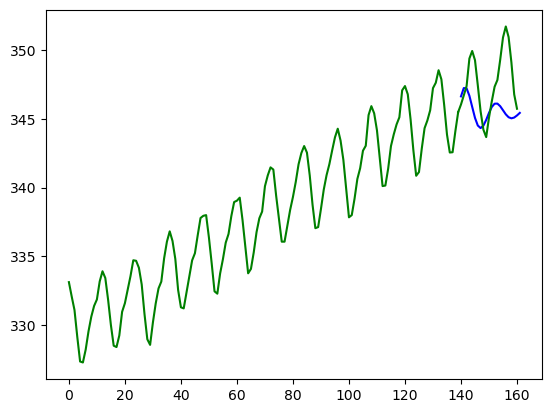

In [16]:
train['CO2'].plot(color='g')
auto_arima.predict(test.shape[0]).plot(color='b')
test['CO2'].plot(color='g')


In [17]:
df.shape

(161, 2)